### Part 3: Run Simulation using estimates from cvxpy optimization

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from tclab import TCLab, clock, Historian, Plotter
import numpy as np
import pandas as pd

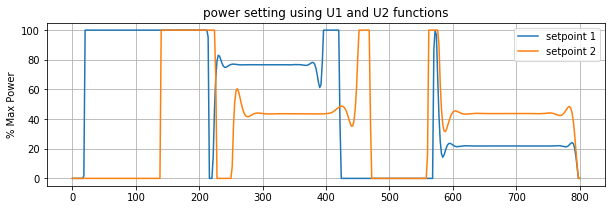

In [8]:
# Paste in lists generated in Colab Optimization Notebook
u1_list = [0.00011352096876330356, 0.00011459863119685045, 0.00011530117332508235, 0.00011550700215477406, 0.000115088582884615, 0.00011391514781998121, 0.00011185649304019058, 0.0001087880463351523, 0.00010459737808727071, 1.6107038176259436, 100.00009251082454, 100.00008460187705, 100.00007554440023, 100.00006543721273, 100.00005439072008, 100.00004252022569, 100.00002994067648, 100.00001676268081, 100.00000308963138, 99.99998901575317, 99.99997462493269, 99.99995999016255, 99.99994517350046, 99.99993022639597, 99.99991519029973, 99.99990009746236, 99.99988497186177, 99.99986983017828, 99.9998546828059, 99.99983953482943, 99.99982438695719, 99.99980923638374, 99.9997940775899, 99.99977890304373, 99.9997637038287, 99.9997484701764, 99.99973319192523, 99.99971785891628, 99.99970246129621, 99.99968698978884, 99.99967143589797, 99.99965579207796, 99.99964005187022, 99.99962421001263, 99.99960826252735, 99.99959220679946, 99.99957604165144, 99.99955976741374, 99.99954338600236, 99.99952690100096, 99.99951031775845, 99.99949364349203, 99.99947688742435, 99.99946006091943, 99.99944317764427, 99.99942625376144, 99.99940930811371, 99.99939236245993, 99.99937544170666, 99.99935857415261, 99.99934179175963, 99.9993251304279, 99.99930863026154, 99.99929233584848, 99.99927629652436, 99.99926056662369, 99.99924520570829, 99.99923027875293, 99.99921585630383, 99.9992020145711, 99.99918883545642, 99.99917640650439, 99.99916482076301, 99.99915417653567, 99.99914457702124, 99.99913612981695, 99.99912894628682, 99.99912314077184, 99.99911882964179, 99.99911613017908, 99.99911515929098, 99.99911603204268, 99.9991188600279, 99.99912374956972, 99.99913079976295, 99.99914010038528, 99.99915172967965, 99.99916575204811, 99.99918221568163, 99.99920115016177, 99.99922256408362, 99.99924644274296, 99.99927274595547, 99.99930140607184, 99.99933232626537, 99.99936537919201, 99.99940040611688, 99.9994372166409, 99.9994755891509, 99.99951527215498, 99.99955598665316, 99.99959742970717, 99.99963927934301, 99.9996812008712, 99.99972285461095, 99.99976390483292, 99.99980402947432, 95.32425381014954, 0.0, 0.0, 0.0, 15.056608532965003, 46.28881316263413, 67.78550598816398, 79.20440240733899, 83.049309658313, 82.44867988899554, 80.02979061349505, 77.51461577364392, 75.75000350377749, 74.93935065972786, 74.91763449351006, 75.3814203949263, 75.96571836597342, 76.46099114656565, 76.82509738866058, 77.02351124435822, 77.07219831120936, 77.0127450861721, 76.89622577008075, 76.76877100004337, 76.66285073601142, 76.59468228247923, 76.56623391361416, 76.56967316384154, 76.5923380892622, 76.62095444137339, 76.64455418668206, 76.66303606795836, 76.67577107512459, 76.67605979342923, 76.66803959060499, 76.65614141907767, 76.6440681631403, 76.63431598779022, 76.62810686121644, 76.62558653665343, 76.62615424579872, 76.62881771508279, 76.6325009299415, 76.63626542191074, 76.6394341001762, 76.64162737333348, 76.64273394784662, 76.64284398254753, 76.64217163877333, 76.64098904111793, 76.63958557903058, 76.63825634218779, 76.63731217506688, 76.63709255133386, 76.6379532796808, 76.64019740588095, 76.64392450617757, 76.64879666135174, 76.65376359558732, 76.65685537071174, 76.65523023810684, 76.64573454426315, 76.62624750625065, 76.59798009067231, 76.5685899257569, 76.55537787734187, 76.58689599535326, 76.70006490870257, 76.77283838792562, 76.7061077889692, 76.70498727280635, 76.7240744026262, 76.72268704733806, 76.67396562755087, 76.5707673004275, 76.42992549410991, 76.29413792876375, 76.22869843674425, 76.30908145611684, 76.59569031346393, 77.09463839770538, 77.70893337628152, 78.19320317315795, 78.13661907860629, 77.01093685322849, 74.32940803519286, 69.9607544592302, 64.70569198987627, 61.24077653446645, 63.35859759980142, 77.73718047965207, 100.00007931374155, 100.00007221290541, 100.00006495464639, 100.00005778335684, 100.00005089872946, 100.0000444613029, 100.00003859843333, 100.00003340985391, 100.00002897237708, 100.0000253436003, 100.0000225647143, 100.00002066269283, 100.0000196522702, 36.06278161879361, 2.0318241138054848e-05, 2.19394855769301e-05, 2.434466441366659e-05, 2.747265048731383e-05, 3.1260742333981796e-05, 3.5647943458823516e-05, 4.0577960919705556e-05, 4.600043335528893e-05, 5.186898982968138e-05, 5.813531585736599e-05, 6.47396203230465e-05, 7.159985622913267e-05, 7.860468018847333e-05, 8.561811055515002e-05, 9.250641722497549e-05, 9.919867338888681e-05, 0.00010562172886217891, 0.00011170110659643653, 0.00011736175796014847, 0.00012252870604996193, 0.00012712761057606843, 0.00013108528349675504, 0.00013433018200773364, 0.00013679290440660527, 0.00013840670664376514, 0.00013910791994432774, 0.00013883656817351573, 0.00013753689668295348, 0.00013515795077145802, 0.00013165419501196348, 0.0001269861685872861, 0.00012112116622562626, 0.00011403393551575584, 0.00010570738115707247, 9.613326106550729e-05, 8.531286841539839e-05, 7.32576796378573e-05, 5.998996136313409e-05, 4.554332012241206e-05, 2.9963182811712658e-05, 1.3307195836873141e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 87.35805311787482, 99.99985184806914, 96.4502156347078, 68.2588048820536, 42.58197745509659, 25.226336551490924, 16.521996442710613, 14.273859675034734, 15.702017327106883, 18.476660429439807, 21.09202649746164, 22.840127970374816, 23.598209630578545, 23.575696827566034, 23.101599554810523, 22.483594596772278, 21.938170824726292, 21.575136493146914, 21.415165776524383, 21.421362802107964, 21.531264839188466, 21.681657944397898, 21.823532146169505, 21.927854436967415, 21.98458782052121, 21.99786443377074, 21.979876497115878, 21.945301663413076, 21.907252330418565, 21.875034804746083, 21.85351785309868, 21.84365321981224, 21.843624752797083, 21.850167059676345, 21.85972665187827, 21.869286862437143, 21.87680749136674, 21.881322940826173, 21.882794134102717, 21.88182476163292, 21.879341336605563, 21.876310451330124, 21.873535552356103, 21.871546931815885, 21.870576875247494, 21.870598673898897, 21.87140307676141, 21.872687005008906, 21.874134709318668, 21.87547877679144, 21.876535651657854, 21.87721636908194, 21.87751736339684, 21.877498365234246, 21.87725478009425, 21.87689098919436, 21.876499249870626, 21.87614678260521, 21.87587160545509, 21.87568598398405, 21.875585160376225, 21.87555836959133, 21.8755990368008, 21.87571143334309, 21.87591187637185, 21.87622369929889, 21.87666658012516, 21.877242239890357, 21.8779198166207, 21.878625138058144, 21.879238389271173, 21.879604039832103, 21.879555175561798, 21.87895154036417, 21.877726840032764, 21.875936701773927, 21.87379495717416, 21.871683737763977, 21.870123488738656, 21.869693540442427, 21.87090296913967, 21.87402486895968, 21.87892329180664, 21.884917889320157, 21.89074209843252, 21.89465091199746, 21.894718259046726, 21.889327854297562, 21.877804939916693, 21.861065580677543, 21.84208890776315, 21.825968135769912, 21.81929707596297, 21.828730518518995, 21.858742112675884, 21.908895074696417, 21.971307323126332, 22.029353449783965, 22.058866420206016, 22.032999889297372, 21.931288274196305, 21.752140420270052, 21.526005436450504, 21.323996995221705, 21.254484802965408, 21.43917391968131, 21.962092506758232, 22.79158987950155, 23.688619553926472, 24.134908469665472, 23.34040811005452, 20.41497563891255, 14.803002090515863, 7.062912224239599, 9.958135594178363e-07, 0.0]
u2_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.99966362999218, 99.99966479841552, 99.99966638319218, 99.99966839092744, 99.9996708273012, 99.99967369699465, 99.99967700361763, 99.99968074962848, 99.99968493625505, 99.9996895634097, 99.99969462960439, 99.99970013185884, 99.99970606561149, 99.99971242462334, 99.9997192008843, 99.99972638451649, 99.99973396367753, 99.99974192446756, 99.99975025083566, 99.99975892449206, 99.99976792482494, 99.99977722882485, 99.99978681101915, 99.9997966434182, 99.99980669547595, 99.99981693406896, 99.99982732349552, 99.9998378254991, 99.99984839931946, 99.99985900177546, 99.99986958738205, 99.99988010850696, 99.99989051556973, 99.9999007572875, 99.99991078097074, 99.99992053287417, 99.99992995860532, 99.99993900359736, 99.99994761365257, 99.99995577613085, 99.99996348404258, 99.99997074080451, 99.99997756510524, 67.99431495538892, 0.0, 0.0, 0.0, 9.458271937100857e-07, 2.416418048739345e-06, 2.4887893180544958e-06, 1.0050422127075198e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 8.27930132217406, 35.768887802356396, 51.68724910738719, 58.98899922447815, 60.483241128225416, 58.53989410240081, 54.97277462700624, 51.03980743042361, 47.51202236687291, 44.77491246287925, 42.9368050294225, 41.92831198965072, 41.58434519695045, 41.70560662030708, 42.100106819204136, 42.60740555913972, 43.10925998144927, 43.53057682937632, 43.83423915533078, 44.01276460622984, 44.07902826552278, 44.057570138987444, 43.97738103476321, 43.86655896479839, 43.74886199823372, 43.641944910541774, 43.556937184088426, 43.49897504328668, 43.468315607358875, 43.46171436739396, 43.47381922249957, 43.49841083528693, 43.5293900919728, 43.561472937421684, 43.590598015873766, 43.61408305474252, 43.63058312315499, 43.63991009165301, 43.64277053270362, 43.640471635633425, 43.63463388425863, 43.62693727073605, 43.618916281472124, 43.61180903752086, 43.60645883010453, 43.60326278714005, 43.60216338618808, 43.6026846149049, 43.60402573574288, 43.60524034734446, 43.60554260791613, 43.60452089556358, 43.60208184360593, 43.59846245464618, 43.59423700715396, 43.59026080957493, 43.587517423420564, 43.58686636617787, 43.5887225341222, 43.59273391622798, 43.59755533011524, 43.60083406206664, 43.599516217513795, 43.59053659545736, 43.57185899640763, 43.543686538745774, 43.50948003430324, 43.47625354511506, 43.45354614124638, 43.45062798165843, 43.4722003832257, 43.51466511781688, 43.565231191402155, 43.60936092838968, 43.65031928446159, 43.70667731555521, 43.806294167484566, 43.98023431252979, 44.256950350624635, 44.656401766166944, 45.18406273062284, 45.82532837209422, 46.54147188598397, 47.26909512051283, 47.92577711689764, 48.42518952278212, 48.704187540447755, 48.66107968730356, 48.14673564554033, 47.018169570908256, 45.197185986877, 42.73377994642945, 39.87140663874524, 37.10687641819196, 35.231992155119116, 35.33750279954826, 38.753262876275684, 46.89270160622237, 60.96643885838644, 81.5313612744151, 99.99998203021154, 99.99997358953684, 99.99996561401198, 99.99995815354782, 99.99995126015372, 99.9999449832687, 99.9999393661924, 99.9999344433877, 99.99993023843476, 39.26993797472868, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.288295305561366, 99.99995102329649, 99.99994362801195, 99.99993604949255, 99.9999288152037, 99.99992245869446, 99.99991752664917, 99.99991460553174, 99.99991431172946, 90.42799895943358, 64.04445029858314, 46.5343638068815, 36.481741280815086, 32.07723116805016, 31.514117144498478, 33.220913225311904, 35.96958207141141, 38.89671493679697, 41.47005071683435, 43.426192946283436, 44.698559951768644, 45.34830220991347, 45.50561475321844, 45.324758131306965, 44.953179146125265, 44.51326649816786, 44.094293291179824, 43.751771921497365, 43.511569380187666, 43.37652194813701, 43.33380392008135, 43.36184044420531, 43.43604097036156, 43.53302878518896, 43.633338925806775, 43.72275338563756, 43.79255145557848, 43.83899218989761, 43.86233479828854, 43.86565957706432, 43.85369241721529, 43.83177210644412, 43.80504012686676, 43.77788269216801, 43.75361686941152, 43.734387184500534, 43.72122505034531, 43.714218740698485, 43.712744122035744, 43.71571358291328, 43.72181041727558, 43.729686546997044, 43.73811156753757, 43.74606976369671, 43.7528084620743, 43.75784568502171, 43.76094762220497, 43.7620871897732, 43.761394255274226, 43.75910636715494, 43.755526438383825, 43.750991160681366, 43.74585128555783, 43.7404625581771, 43.7351842264699, 43.73038080864491, 43.72642227037666, 43.72367797166653, 43.722500675091425, 43.723198497654195, 43.725994820068934, 43.730978670277395, 43.73805074479091, 43.7468727386818, 43.75682969394384, 43.76701627884269, 43.77625790677469, 43.78317604726394, 43.786303709084, 43.78425175827469, 43.7759195509419, 43.76073465825968, 43.73889691648604, 43.7115926868222, 43.68113746142528, 43.65100052145242, 43.625666156102064, 43.6102939080063, 43.61015706565915, 43.62986518122831, 43.6724126873894, 43.73814011129231, 43.82374333846108, 43.921513914318815, 44.01903102668895, 44.099542782567916, 44.14325814656853, 44.129708422790465, 44.04121686584651, 43.867329527889765, 43.60981012093411, 43.28749865177096, 42.9400062086512, 42.628915070471365, 42.43494574187534, 42.449535310035984, 42.75955899425465, 43.42464355719622, 44.447785637737, 45.74188634514205, 47.097364501296774, 48.1591211119666, 48.42453808608041, 47.27742457776785, 44.07512077445292, 38.30626718732936, 29.833665672753504, 19.22853840215036, 8.187508955848058, 2.0719100826267081e-07, 0.0]
t_list = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, 182.0, 184.0, 186.0, 188.0, 190.0, 192.0, 194.0, 196.0, 198.0, 200.0, 202.0, 204.0, 206.0, 208.0, 210.0, 212.0, 214.0, 216.0, 218.0, 220.0, 222.0, 224.0, 226.0, 228.0, 230.0, 232.0, 234.0, 236.0, 238.0, 240.0, 242.0, 244.0, 246.0, 248.0, 250.0, 252.0, 254.0, 256.0, 258.0, 260.0, 262.0, 264.0, 266.0, 268.0, 270.0, 272.0, 274.0, 276.0, 278.0, 280.0, 282.0, 284.0, 286.0, 288.0, 290.0, 292.0, 294.0, 296.0, 298.0, 300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312.0, 314.0, 316.0, 318.0, 320.0, 322.0, 324.0, 326.0, 328.0, 330.0, 332.0, 334.0, 336.0, 338.0, 340.0, 342.0, 344.0, 346.0, 348.0, 350.0, 352.0, 354.0, 356.0, 358.0, 360.0, 362.0, 364.0, 366.0, 368.0, 370.0, 372.0, 374.0, 376.0, 378.0, 380.0, 382.0, 384.0, 386.0, 388.0, 390.0, 392.0, 394.0, 396.0, 398.0, 400.0, 402.0, 404.0, 406.0, 408.0, 410.0, 412.0, 414.0, 416.0, 418.0, 420.0, 422.0, 424.0, 426.0, 428.0, 430.0, 432.0, 434.0, 436.0, 438.0, 440.0, 442.0, 444.0, 446.0, 448.0, 450.0, 452.0, 454.0, 456.0, 458.0, 460.0, 462.0, 464.0, 466.0, 468.0, 470.0, 472.0, 474.0, 476.0, 478.0, 480.0, 482.0, 484.0, 486.0, 488.0, 490.0, 492.0, 494.0, 496.0, 498.0, 500.0, 502.0, 504.0, 506.0, 508.0, 510.0, 512.0, 514.0, 516.0, 518.0, 520.0, 522.0, 524.0, 526.0, 528.0, 530.0, 532.0, 534.0, 536.0, 538.0, 540.0, 542.0, 544.0, 546.0, 548.0, 550.0, 552.0, 554.0, 556.0, 558.0, 560.0, 562.0, 564.0, 566.0, 568.0, 570.0, 572.0, 574.0, 576.0, 578.0, 580.0, 582.0, 584.0, 586.0, 588.0, 590.0, 592.0, 594.0, 596.0, 598.0, 600.0, 602.0, 604.0, 606.0, 608.0, 610.0, 612.0, 614.0, 616.0, 618.0, 620.0, 622.0, 624.0, 626.0, 628.0, 630.0, 632.0, 634.0, 636.0, 638.0, 640.0, 642.0, 644.0, 646.0, 648.0, 650.0, 652.0, 654.0, 656.0, 658.0, 660.0, 662.0, 664.0, 666.0, 668.0, 670.0, 672.0, 674.0, 676.0, 678.0, 680.0, 682.0, 684.0, 686.0, 688.0, 690.0, 692.0, 694.0, 696.0, 698.0, 700.0, 702.0, 704.0, 706.0, 708.0, 710.0, 712.0, 714.0, 716.0, 718.0, 720.0, 722.0, 724.0, 726.0, 728.0, 730.0, 732.0, 734.0, 736.0, 738.0, 740.0, 742.0, 744.0, 746.0, 748.0, 750.0, 752.0, 754.0, 756.0, 758.0, 760.0, 762.0, 764.0, 766.0, 768.0, 770.0, 772.0, 774.0, 776.0, 778.0, 780.0, 782.0, 784.0, 786.0, 788.0, 790.0, 792.0, 794.0, 796.0, 798.0, 800.0]

def U1(t):
    return np.interp(t, t_list, u1_list)
def U2(t):
    return np.interp(t, t_list, u2_list)

# plot function
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(t_list, U1(t_list), label="setpoint 1")
ax.plot(t_list, U2(t_list), label='setpoint 2')
ax.set_title('power setting using U1 and U2 functions')
ax.set_ylabel('% Max Power')
ax.legend()
ax.grid(True)

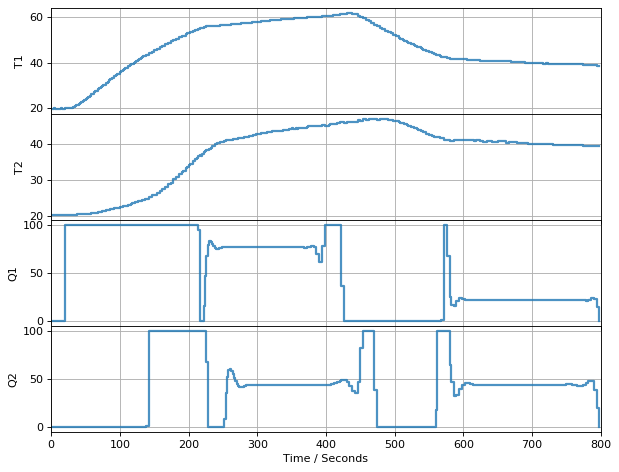

TCLab disconnected successfully.


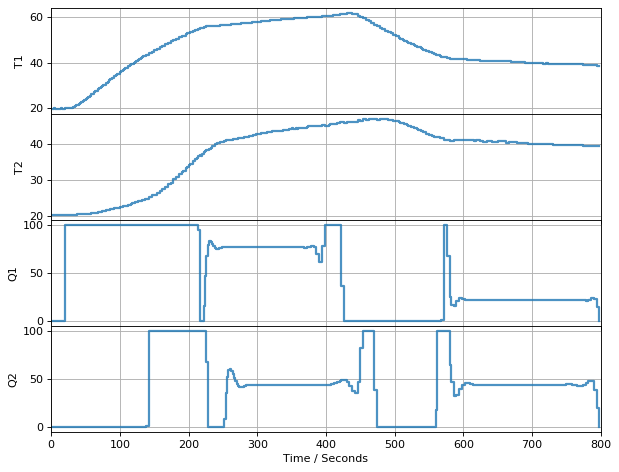

In [9]:
with TCLab() as lab:
    
    t_period = 800
    t_step = 2
    
    h = Historian(lab.sources)
    p = Plotter(h, t_period)
    
    lab.P1 = 200
    lab.P2 = 100
    
    for t in clock(t_period, t_step):
        
        lab.Q1(U1(t))
        lab.Q2(U2(t))
        p.update(t)
        
h.to_csv('data_L8.csv')

In [16]:
# Read TCLab data
data = pd.read_csv('data_L8.csv')

# # time grid
tf = 800
dt = 2
n = round(tf/dt)
t_grid = np.linspace(0, tf, n+1)

# ambient temperature
Tamb = 21

# setpoint/reference
def r_SP1(t):
    return np.interp(t, [0, 50, 150, 450, 550], [Tamb, Tamb, 60, 60, 35])
# Maintain the same slope
def r_SP2(t):
    return np.interp(t, [0, 150, 211.54, 511.54, 551.54], [Tamb, Tamb, 45, 45, 35])

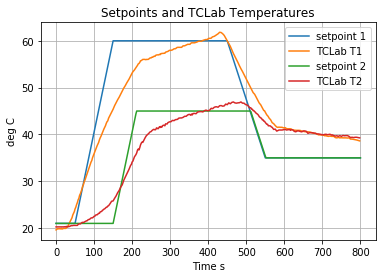

In [23]:
# Plot device temperature vs. Desired Output
# plot function
plt.plot(t_list, r_SP1(t_list), label="setpoint 1")
plt.plot(data["Time"],data["T1"], label="TCLab T1")
plt.plot(t_list, r_SP2(t_list), label='setpoint 2')
plt.plot(data["Time"], data["T2"], label="TCLab T2")
plt.title('Setpoints and TCLab Temperatures')
plt.ylabel('deg C')
plt.xlabel('Time s')
plt.legend(loc='best')
plt.grid(True)

### Exercise 3 Discussion
Apply the functions U1(t) and U2(t) to your hardware and compare the measured sensor temperatures to those predicted in Exercise 2. How did you do?

The U1(t) and U2(t) functions for the heater setpoints were applied to the TCLab. The graph of the actual temperatures against the setpoints is plotted above. From the graph, the optimization solution provides a somewhat accurate model. For example, the general temperature increases and decreases follow the shape of the setpoint temperatures. And the maximum temperature for the setpoints is reached by the TCLab run. 

However, the TCLab performance is otherwise lackluster. First, although both heaters do reach the setpoint max temperature, the TCLab ends up exceeding these maximum temperatures. Second, according to the optimization model the maximum T1 temperature of 60 degrees C should be reached after 200 seconds; but in the TCLab run, the maximum temperature is not reached until 400 seconds. This means that the TCLab is below the desired setpoint for both temperatures for several hundred seconds. Finally, neither temperature in the TCLab reaches the low, final temperature setpoint; this means that there is so much residual heat in the system that the device cannot cool down to 35 degrees C in the given time. 

Given these shortcomings, the optimization problem provides flawed U1(t) and U2(t) heater functions. 